In [70]:
import os
os.chdir(r'C:\Users\nadda\Desktop\KU\01204314-65-Statistics-for-Computer-Engineering-Applications\week3')
os.getcwd()

'C:\\Users\\nadda\\Desktop\\KU\\01204314-65-Statistics-for-Computer-Engineering-Applications\\week3'

In [71]:
import math
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Categorical Data Analysis

## Part 1: Homogeneity Test

In [ ]:
df1 = pd.read_csv("austen.csv")
df1

,Work,a,an,this,that,with,without
0,Sense and Sensibility,147,25,32,94,59,18
1,Emma,186,26,39,105,74,10
2,Sandition,101,11,15,37,28,10


In [73]:
chi_stat, p_value, dof, expected = st.chi2_contingency(df1.iloc[:, 1:])
print(f"Test Statistic:    {chi_stat}")
print("P Value:            {:.15f}".format(p_value))
print("Significance level: 0.1")

Test Statistic:    12.271390062065421
P Value:            0.267303934383238
Significance level: 0.1


## Part 2: Independence Test

In [ ]:
df2 = pd.read_csv("marriage_and_education.csv")
df2

,Education,Once,MoreThanOnce
0,College,550,61
1,No college,681,144


In [75]:
chi_stat, p_value, dof, expected = st.chi2_contingency(df2.iloc[:, 1:])
print(f"Test Statistic:    {chi_stat}")
print("P Value:            {:.15f}".format(p_value))
print("Significance level: 0.01")

Test Statistic:    15.405104990912207
P Value:            0.000086753607966
Significance level: 0.01


# Analysis of Variance: Single Factor

## Part 1: Equal Sample Size

In [1]:
setwd("C:\\Users\\nadda\\Desktop\\KU\\01204314-65-Statistics-for-Computer-Engineering-Applications\\week3")

In [4]:
df <- read.csv("lab_R.csv", sep=",", header=T, fileEncoding="UTF-8-BOM")
df

measurements,lab
<dbl>,<int>
4.13,1
4.07,1
4.04,1
4.07,1
4.05,1
4.04,1
4.02,1
4.06,1
4.10,1


In [5]:
polymerFactor <- factor(df$lab)
anovaResult <- aov(df$measurements~polymerFactor, data=df)
summary(anovaResult)

              Df Sum Sq  Mean Sq F value   Pr(>F)    
polymerFactor  6 0.1247 0.020790    5.66 9.45e-05 ***
Residuals     63 0.2314 0.003673                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [6]:
qf(0.99, 6, 63)

[1] 3.102767

In [7]:
qtukey(0.01, nmeans=anovaResult$rank, df=anovaResult$df.residual, lower.tail=F)

[1] 5.120665

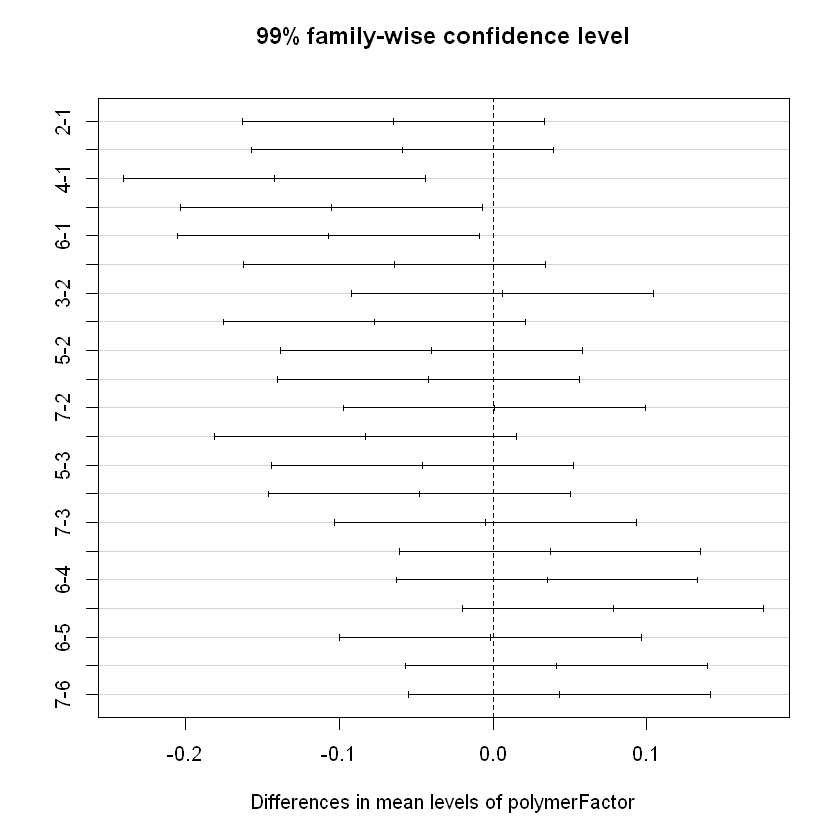

In [8]:
tk <- TukeyHSD(anovaResult, conf.level = 0.99)
plot(tk)

## Part 2: Unequal Sample Size

In [11]:
df <- read.csv("mg_R.csv", sep=",", header=T, fileEncoding="UTF-8-BOM")
df

Strength,Process
<dbl>,<int>
45.5,1
45.3,1
45.4,1
44.4,1
44.6,1
43.9,1
44.6,1
44.0,1
44.2,2


In [12]:
processFactor <- factor(df$Process)
anovaResult <- aov(df$Strength~processFactor, data=df)
summary(anovaResult)

              Df Sum Sq Mean Sq F value   Pr(>F)    
processFactor  2  7.930   3.965   12.56 0.000334 ***
Residuals     19  5.996   0.316                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [13]:
qf(0.999, 2, 19)

[1] 10.15681

In [14]:
qtukey(0.001, nmeans = anovaResult$rank, df = anovaResult$df.residual, lower.tail = F)

[1] 6.126204

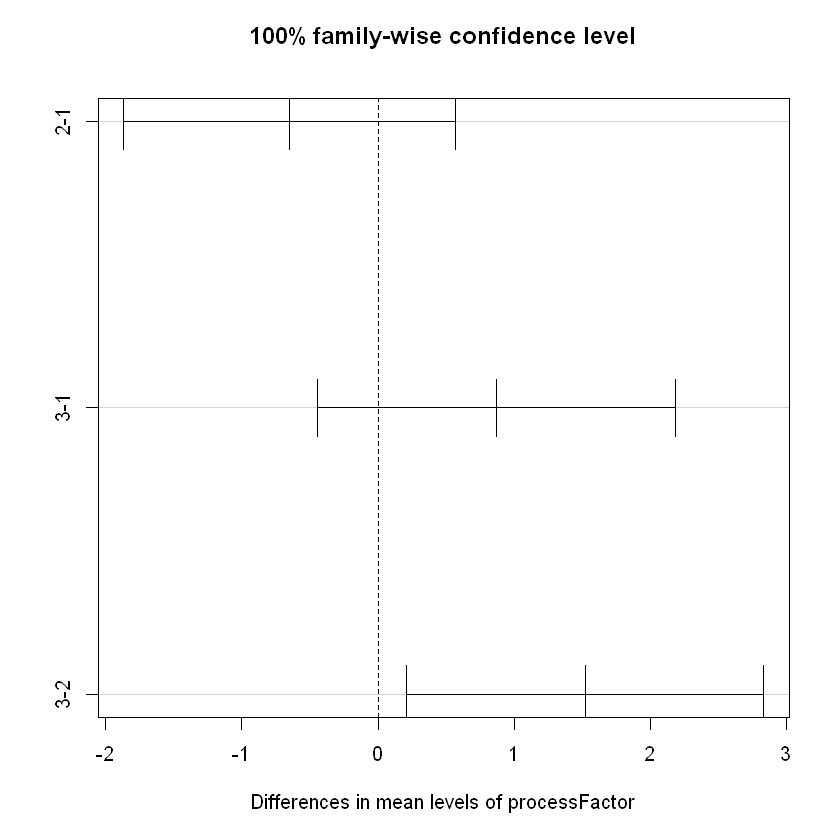

In [25]:
tk <- TukeyHSD(anovaResult, conf.level = 0.999)
plot(tk)